<img src="http://iict-space.heig-vd.ch/apu/wp-content/uploads/sites/21/2022/01/2020-slim.png" alt="HEIG-VD Logo" width="100" align="right"/>

# Cours TAL - Laboratoire 3 : Analyse syntaxique du français

**Objectifs**

1. Utiliser un analyseur syntaxique **en constituants** pour extraire tous les groupes nominaux d'un texte.
1. Appliquer un analyseur syntaxique **de dépendances** sur des données de test en français et calculer son score.
1. Entraîner l'analyseur **de dépendances** sur des données adaptées et mesurer si les performances se sont améliorées ou non.

## 1.	Utiliser un analyseur syntaxique en constituants pour extraire les groupe nominaux

Vous utiliserez l'analyseur syntaxique en constituants appelé `LexicalizedParser` fourni parmi les outils CoreNLP de Stanford, et [documenté ici](https://nlp.stanford.edu/nlp/javadoc/javanlp/edu/stanford/nlp/parser/lexparser/LexicalizedParser.html).  


* **code Java** : fichier `stanford-corenlp-3.9.2.jar` (8 Mo) fourni sur Cyberlearn
* **modèle** : fichier `frenchFactored.ser.gz` (4 Mo) fourni sur Cyberlearn
* **données** : fichier `exemple.txt` fourni sur Cyberlearn

a. Veuillez écrire la ligne de commande (java) qui effecte l'analyse syntaxique en constituants du texte `exemple.txt`. Choisissez 'oneline' comme format et écrivez les résultats dans un ficher.

In [4]:
! java -Xmx1024m -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.lexparser.LexicalizedParser -outputFormat oneline -writeOutputFiles frenchFactored.ser.gz exemple.txt

Loading parser from serialized file frenchFactored.ser.gz ... done [2.2 sec].
Parsing file: exemple.txt
edu.stanford.nlp.international.french.process.FrenchLexer: Invalid options key in constructor: splitContractions
Parsing [sent. 1 len. 12]: Les gares voyageurs sont en fait des ensembles fonctionnels plus larges .
Parsing [sent. 2 len. 20]: Elles regroupent toutes les fonctions centrées sur l' accès à le train et l' achat des titres de transport .
Parsing [sent. 3 len. 11]: Elles offrent aussi divers services commerciaux liés à le voyage .
Parsing [sent. 4 len. 16]: Pour certaines gares , le passage de nombreux voyageurs justifie l' installation de fonctions annexes .
Parsing [sent. 5 len. 13]: Il s' agit , par exemple , de commerces et services variés .
Parsing [sent. 6 len. 12]: Les gares peu importantes sont appelées haltes ou points d' arrêt .
Parsing [sent. 7 len. 23]: Le train est un matériel roulant ferroviaire assurant le transport de personnes ou de marchandises sur une lign

b. Importez le fichier de résultats du LexicalizedParser comme une liste d'arbres, en utilisant la classe `BracketParseCorpusReader` de NLTK.  Chaque ligne contenant une analyse syntaxique sera importée comme un objet `Tree` de NLTK. 

In [5]:
from nltk.corpus.reader.bracket_parse import BracketParseCorpusReader
from nltk.tree import Tree
from nltk.draw.tree import TreeView

bracket = BracketParseCorpusReader('.', 'exemple.txt.stp')

c:\Users\nicol\miniconda3\envs\isd\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\nicol\miniconda3\envs\isd\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\nicol\miniconda3\envs\isd\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
sents = []
for sent in bracket.parsed_sents():
    sents.append(sent)


c. Cherchez dans la [documentation](https://www.nltk.org/_modules/nltk/tree.html#Tree) de `Tree` une fonction d'affichage, et affichez l'arbre de la première ligne.

In [7]:
print(sents[0].pretty_print())

                                   ROOT                                                
                                    |                                                   
                                   SENT                                                
       _____________________________|_______________________________________________    
      NP             |         |                           NP                       |  
  ____|_______       |         |          _________________|_____________           |   
 |    |       AP     VN      MWADV       |      |          AP            AP         |  
 |    |       |      |     ____|____     |      |          |         ____|____      |   
DET   NC     ADJ     V    P         N   DET     NC        ADJ      ADV       ADJ   PUNC
 |    |       |      |    |         |    |      |          |        |         |     |   
Les gares voyageurs sont  en       fait des ensembles fonctionnels plus     larges  .  

None


d.  Écrivez le code qui extrait les groupes nominaux de toutes les phrases (en anglais: Noun Phrases), et qui affiche les 5 les plus fréquents avec leurs nombres d'occurrences.

In [8]:
# 
np_trees = []
for sent in sents:
    for subtree in sent.subtrees(lambda t: t.label() == 'NP'):
        np_trees.append(subtree.leaves())

np_freq = {}
for np in np_trees:
    np_str = ' '.join(np)
    if np_str in np_freq:
        np_freq[np_str] += 1
    else:
        np_freq[np_str] = 1

sorted_np_freq = sorted(np_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_np_freq[:5])



[('transport', 2), ('Le train', 2), ('Les gares voyageurs', 1), ('des ensembles fonctionnels plus larges', 1), ("toutes les fonctions centrées sur l' accès à le train et l' achat des titres de transport", 1)]


e. Veuillez répéter l'expérience avec un texte plus long (un texte en français du projet Gutenberg) et afficher les 20 groupes nominaux les plus fréquents.  Veuillez indiquer approximativement combien de temps a pris l'analyse syntaxique.

In [9]:
# Importation du texte "les misérables"
from urllib import request
url = 'https://www.gutenberg.org/files/17489/17489-8.txt'
response = request.urlopen(url)
raw = response.read().decode('ISO-8859-1')

# create a file miserables.txt
with open('miserables.txt', 'w') as f:
    f.write(raw.replace('\n', ' '))

In [10]:
! java -Xmx1024m -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.lexparser.LexicalizedParser -outputFormat oneline -writeOutputFiles frenchFactored.ser.gz miserables.txt

Loading parser from serialized file frenchFactored.ser.gz ... done [2.0 sec].
Parsing file: miserables.txt
edu.stanford.nlp.international.french.process.FrenchLexer: Invalid options key in constructor: splitContractions
Parsing [sent. 1 len. 32]: The Project Gutenberg EBook of Les misérables Tome I , by Victor Hugo This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever .

*******************************************************
***  WARNING!! OUT OF MEMORY! THERE WAS NOT ENOUGH  ***
***  MEMORY TO RUN ALL PARSERS.  EITHER GIVE THE    ***
***  JVM MORE MEMORY, SET THE MAXIMUM SENTENCE      ***
***  LENGTH WITH -maxLength, OR PERHAPS YOU ARE     ***
***  HAPPY TO HAVE THE PARSER FALL BACK TO USING    ***
***  A SIMPLER PARSER FOR VERY LONG SENTENCES.      ***
*******************************************************

Sentence too long for dependency parser.  Falling back to PCFG parse...
Parsing [sent. 2 len. 642]: You may copy it , give it away o

In [11]:
from nltk.corpus.reader.bracket_parse import BracketParseCorpusReader
from nltk.tree import Tree
from nltk.draw.tree import TreeView

bracket = BracketParseCorpusReader('.', 'miserables.txt.stp')

sents = []
for sent in bracket.parsed_sents():
    sents.append(sent)

print(sents[0].pretty_print())

                                                                                        ROOT                                                                                                   
                                                                                         |                                                                                                      
                                                                                        SENT                                                                                                   
                 ________________________________________________________________________|__________________________________________________________________________________________________    
                |                                                                                 NP                                                                                        |  
                |                 ____

In [12]:

np_trees = []
for sent in sents:
    for subtree in sent.subtrees(lambda t: t.label() == 'NP'):
        np_trees.append(subtree.leaves())

np_freq = {}
for np in np_trees:
    np_str = ' '.join(np)
    if np_str in np_freq:
        np_freq[np_str] += 1
    else:
        np_freq[np_str] = 1

sorted_np_freq = sorted(np_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_np_freq[:20])


[('The Project Gutenberg EBook of', 1), ('Les misérables Tome I , by Victor Hugo This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever', 1), ('by Victor Hugo This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever', 1)]


L'analyse syntaxique a pris environ une minute. Il y a beaucoup de phrases qui sont trop longues pour être parsées correctement par le parser de Stanford. Néanmoins nous avons estimé que les 85 phrases parsées étaient suffisantes pour avoir une idée de la fréquence des groupes nominaux.

## 2. Analyse de dépendances

Dans cette partie, vous utiliserez le [Stanford Dependency Parser](https://nlp.stanford.edu/software/nndep.html), un analyseur fondé sur un réseau de neurones.

* **code Java** : fichier `stanford-corenlp-3.9.2.jar` (8 Mo) fourni sur Cyberlearn (note: on peut le télécharger avec un [package fourni par Stanford](https://nlp.stanford.edu/software/lex-parser.html) ou depuis le [site Maven de Stanford CoreNLP](https://search.maven.org/artifact/edu.stanford.nlp/stanford-corenlp/3.9.2/jar))
* **modèle** : fichier `UD_French.gz` (10 Mo) fourni sur Cyberlearn (note: plusieurs modèles sont disponibles sur le site Maven, dont un package pour le français de 272 MB, mais ici vous aurez seulement besoin du modèle UD pour Universal Dependencies)
* **données** : les mêmes que pour le labo 2, disponibles dans [l'archive ZIP fournie par l'enseignant](https://drive.switch.ch/index.php/s/5ZNllZOApTWHGwH) (mot de passe = reference).  Ces textes en français proviennent du projet [Universal Dependencies (UD)](https://github.com/UniversalDependencies/UD_French-GSD).  Le fichier `fr-ud-train.conllu3` est destiné à l'entraînement, `fr-ud-dev.conllu3` à la validation, et `fr-ud-test.conllu3` à l'évaluation finale.

Pour effectuer les tâches suivantes, utilisez la [documentation](https://nlp.stanford.edu/nlp/javadoc/javanlp/edu/stanford/nlp/parser/nndep/DependencyParser.html) et regardez surtout le `main()` et les exemples données à la fin.

a. Exécuter le parser en Java (avec une commande externe `!java -cp ...` comme au labo 2) en l'appliquant au fichier UD de *test* en français.  Écrivez le résultat détaillé dans un fichier plutôt qu'à l'écran.  Quels sont les deux scores obtenus et que signifient-ils ?


In [13]:
# Veuillez écrire ici la commande pour tester le parser avec le modèle pré-entraîné.
# ! java -Xmx1024m -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.lexparser.LexicalizedParser -outputFormat oneline -writeOutputFiles frenchFactored.ser.gz miserables.txt
# ! java -cp stanford-postagger.jar edu.stanford.nlp.tagger.maxent.MaxentTagger -model french-ud.tagger -testFile "format=TSV,wordColumn=1,tagColumn=3,fr-ud-dev.conllu3" -ou
! java -Xmx1024m -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser -model UD_French.gz -testFile fr-ud-test.conllu3 -outFile fr-ud-test.conllu3.out

Loading depparse model: UD_French.gz ... 
###################
#Transitions: 81
#Labels: 40
ROOTLABEL: root
PreComputed 99996, Elapsed Time: 10.871 (s)
Initializing dependency parser ... done [11.9 sec].
Test File: fr-ud-test.conllu3
OOV Words: 608 / 10020 = 6,07%
UAS = 55,0699
LAS = 41,1577
DependencyParser parsed 10020 words in 416 sentences in 4,3s at 2305,6 w/s, 95,7 sent/s.


Les deux scores obtenus sont UAS (Unlabeled Attachment Score) et LAS (Labeled Attachment Score). UAS est le pourcentage de mots auxquels on a attribué le bon groupe syntaxique, tandis que LAS est le pourcentage de mots auxquels on a attribué le bon groupe syntaxique ainsi que le bon label.

## 3. Entraîner l'analyseur de dépendances

a. Veuillez entraîner l'analyseur en suivant les indications suivantes:
* donnez un nouveau nom au modèle qui sera créé (ne pas écraser l'ancien)
* utilisez à la fois `train` et `dev` comme indiqué dans la documentation
* évitez un output trop verbeux en le redirigeant vers un fichier `output.txt` (ajoutez `>output.txt 2>&1` à la commande)
* plusieurs options indiquées dans la documentation peuvent être utiles
  * `-wordCutOff 3` pour traiter seulement les mots apparaissant plus de 3 fois, ce qui évite en particulier le problème des nombres écrits avec un espace (apparaissant 1 fois)
  * `-trainingThreads 4` pour utiliser pleinement votre processeur : indiquez le maximum selon votre modèle
  * `-maxIter 5000` pour arrêter l'entraînement après 5000 itérations (essayez d'abord beaucoup moins pour vous faire une idée du temps, puis si vous le pouvez, allez plus loin que 5000)

In [2]:
# Veuillez écrire ici la commande pour entraîner l'analyseur sur le fichier 'train' et créer un nouveau modèle.
# Pour ne pas bloquer votre notebook, vous pouvez l'exécuter dans l'invite de commandes.
! java -Xmx8g -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser -trainFile fr-ud-train.conllu3 -devFile fr-ud-dev.conllu3 -model UD_French_custom.gz -wordCutOff 3 -trainingThreads 8 -maxIter 5000 >output.txt 2>&1

b. Quels sont les scores (sur les données de test) du système que vous avez entraîné ?  Comment se comparent-ils avec ceux du système par défaut ?

In [3]:
# Veuillez écrire ici la commande pour tester l'analyseur avec le nouveau modèle.
! java -Xmx1024m -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser -model UD_French_custom.gz -testFile fr-ud-test.conllu3 -outFile fr-ud-test-custom.conllu3.out

Loading depparse model: UD_French_custom.gz ... 
Loaded TreebankLanguagePack: edu.stanford.nlp.trees.PennTreebankLanguagePack
###################
#Transitions: 91
#Labels: 45
ROOTLABEL: root
PreComputed 100000, Elapsed Time: 0.981 (s)
Initializing dependency parser ... done [1.6 sec].
Test File: fr-ud-test.conllu3
OOV Words: 1100 / 10020 = 10,98%
UAS = 77,8343
LAS = 71,5768
DependencyParser parsed 10020 words in 416 sentences in 0,6s at 16345,8 w/s, 678,6 sent/s.


Le score UAS du système que nous avons entraîné est de 77.83% tandis que le score LAS est de 71.58%. Ces scores sont largement supérieurs aux UAS de 55.07% et LAS de 41.16% obtenus par le système par défaut. Il s'agit du comportement attendu puisque nous avons cette fois-ci entraîné le modèle sur des données similaires aux données de test contrairement au système par défaut qui a été entraîné sur des données différentes.

c. En traitant le fichier de logs du parser (après l'entraînement), collectez les scores UAS obtenus sur l'ensemble de développement (ou validation).  Affichez sur un graphe l'évolution du score au cours de l'entraînement.  À quelle itération obtenez-vous la valeur maximale de ce score ? Le nombre d'itérations de l'entraînement vous semble-t-il suffisant  ?

In [6]:
# Veuillez écrire ici le code qui extrait les valeurs.

uas = []
with open('output.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        if 'UAS' in line:
            # traitement de la ligne pour en extraire la valeur de la métrique
            uas.append(float(line.split(' ')[-1]))


50

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

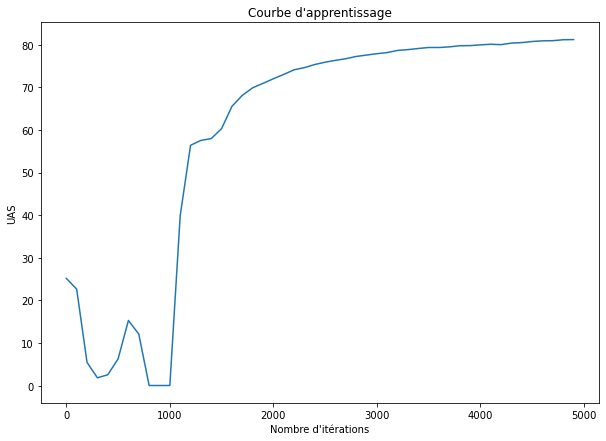

In [18]:
# Écrivez ici le code affichant la courbe, avec les valeurs de x multipliées par 100
plt.figure(figsize=(10, 7))
plt.title('Courbe d\'apprentissage')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('UAS')
plt.plot([i*100 for i in range(len(uas))], uas)

La valeur maximale de ce score est obtenue à l'itération 5000, à savoir la dernière itération de notre entraînement. A partir d'environ 2000 itérations, la courbe semble se stabiliser. Cependant, on constate également que le score UAS continue d'augmenter jusqu'à la dernière itération, ce qui nous incite à augmenter le nombre d'itérations afin d'observer le comportement de la courbe. En effet, elle pourrait continuer à augmenter, mais elle pourrait également commencer à redescendre, ce qui serait un signe d'overfitting et donc d'un nombre trop élevé d'itérations.

## Fin du laboratoire 3

Merci de nettoyer votre feuille et de la sauvegarder.  Puis soumettez-la sur Cyberlearn.